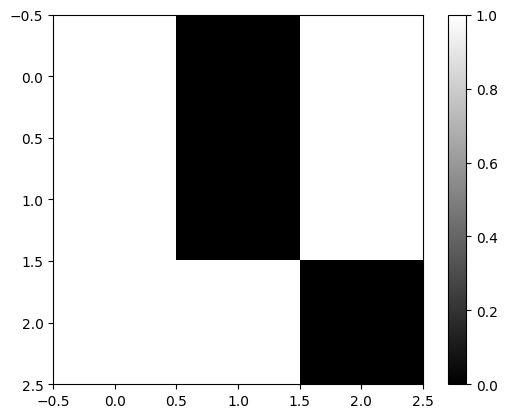

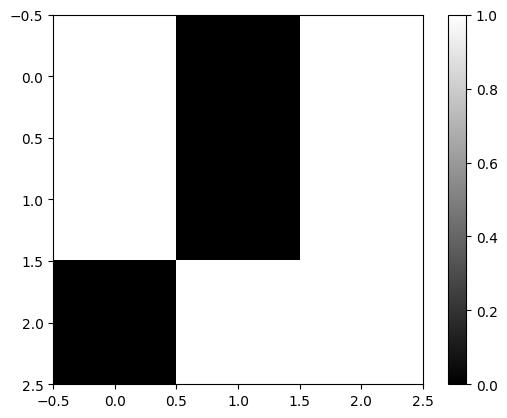

In [2]:
# Mirroring
import torch
import matplotlib.pyplot as plt

input = torch.tensor([[1, 0, 1], [1, 0, 1], [1, 1, 0]])
plt.imshow(input.numpy(), interpolation='nearest', cmap='gray')
output = torch.flip(input, [1])
plt.colorbar()
plt.show()
plt.imshow(output.numpy(), interpolation='nearest', cmap='gray')
plt.colorbar()
plt.show()

In [3]:
from src.data.toy_datamodule import ToyDataModule

horizontal_flip = lambda x: torch.flip(x, [2])
data = ToyDataModule(target_fn=horizontal_flip)
data.setup('fit')

NameError: name 'torch' is not defined

In [4]:
import torch
from src.data.toy_datamodule import ToyDataModule


def redistribute_ones_pytorch_batch(tensors):
    reshaped_tensors = []
    for tensor in tensors:
        total_ones = tensor.sum().item()
        zeros_tensor = torch.zeros_like(tensor)
        ones_flat = torch.ones(total_ones)
        zeros_flat = zeros_tensor.flatten()
        zeros_flat[:total_ones] = ones_flat
        reshaped_tensors.append(zeros_flat.reshape(tensor.shape))
    return torch.stack(reshaped_tensors)

# # Example usage
# tensors = torch.tensor([
#     [[1, 0, 0], [1, 1, 0], [0, 1, 1]],
#     [[0, 1, 1], [0, 0, 1], [1, 1, 0]]
# ])

# redistributed_tensors = redistribute_ones_pytorch_batch(tensors)
# print(redistributed_tensors)


data = ToyDataModule(target_fn=redistribute_ones_pytorch_batch)
data.setup('fit')

In [1]:
from src.data.toy_datamodule import ToyDataModule

# Example usage
from src.utils.data_functions.move_object import move_object_input_fn, move_object_target_fn

# input = move_object_input_fn(3, 5, 5)
# print(input)

data = ToyDataModule(input_fn=move_object_input_fn, target_fn=move_object_target_fn)
data.setup('fit')

# num_samples = 5
# img_width = 10
# img_height = 10
# batches = move_object_input_fn(num_samples, img_width, img_height)
# output_images = move_object_target_fn(batches)
# for i in range(num_samples):
#     print("Input Image:\n", batches[0][i])
#     print("Output Image:\n", output_images[i])

inputs shape: torch.Size([10000, 8, 8])
targets shape: torch.Size([10000, 8, 8])
inputs shape after unsqueeze: torch.Size([10000, 1, 8, 8])
targets shape after unsqueeze: torch.Size([10000, 1, 8, 8])


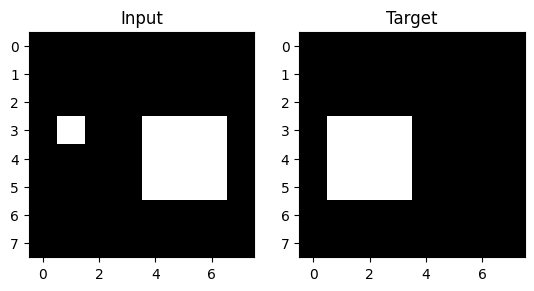

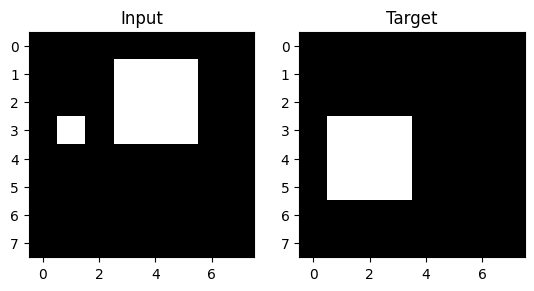

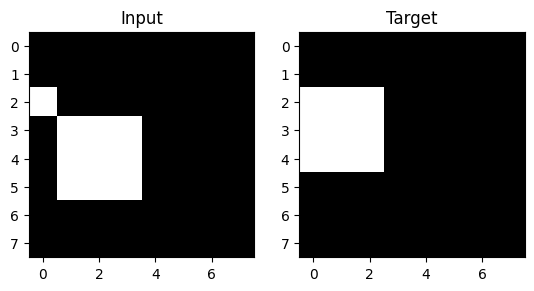

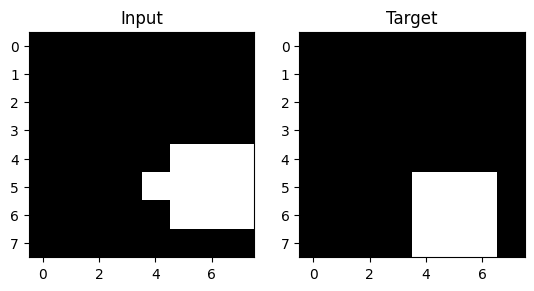

In [3]:
import torch
import matplotlib.pyplot as plt

for index, (input, target) in enumerate(data.train_dataloader()): 
    input, target = input.squeeze(), target.squeeze()
    plt.subplot(1, 2, 1)
    plt.imshow(input[0].numpy(), interpolation='nearest', cmap='gray')
    plt.title('Input')
    plt.subplot(1, 2, 2)
    plt.imshow(target[0].numpy(), interpolation='nearest', cmap='gray')
    plt.title('Target')
    plt.show()
    
    if index == 3:
        break